In [2]:
# %load firstcell.txt
%reload_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.rcParams['figure.dpi']=100

### Measures to compare:

+ Total imports value - tot_imp_vl
+ Total exports value - tot_exp_vl
+ Total imports quantity - tot_imp_qt
+ Total exports quantity - tot_exp_qt
+ Difference between total exports and total imports value - diff_exp_imp_vl
+ Difference between total exports and total imports quantity- diff_exp_imp_qt
+ Gross domestic product - gdp
+ Population - pop
+ Total export distance - dist_exp
+ Total import distance - dist_imp

In [145]:
# food trade data
df=pd.read_csv('united_names_datasets/tradeMatrix_PWG.csv')

In [168]:
# Load antifragility values

# Not normalized
af = pd.read_csv('normalization/datasets_intersection/af_food_trade_mean.csv',index_col=0)

# Distance normalized
af_distances = pd.read_csv('normalization/distan_datasets/distances_af_percountry.csv',index_col=0)

# Caloric normalized
af_caloric = pd.read_csv('normalization/caloric_af_percountry.csv',index_col=0)

# GDP normalized and population normalized
af_gdp_pop= pd.read_csv('normalization/datasets_intersection/gdp_pop_af_food_trade_percountry.csv',index_col=0)

af_gdp = af_gdp_pop.iloc[:,:8]

af_pop = af_gdp_pop.iloc[:,8:]

dict_afs = {'af':af,'af_distances':af_distances,'af_caloric':af_caloric,'af_gdp':af_gdp,'af_pop':af_pop}

In [174]:
#### Total imports value - tot_imp_v
tot_imp_vl=df[df.Element=='Import Value'].groupby('importer')['Value'].sum() # compute total imports value

#### Total exports value - tot_exp_vl
tot_exp_vl = df[df.Element=='Import Value'].groupby('exporter')['Value'].sum() # compute total exports value

#### Total imports quantity - tot_imp_qt
tot_imp_qt = df[df.Element=='Import Quantity'].groupby('importer')['Value'].sum()

#### Total exports quantity - tot_exp_qt
tot_exp_qt = df[df.Element=='Import Quantity'].groupby('exporter')['Value'].sum()

#### Difference between total exports and total imports value - diff_exp_imp_vl
diff_exp_imp_vl = tot_exp_vl-tot_imp_vl

#### Difference between total exports and total imports quantity- diff_exp_imp_qt
diff_exp_imp_qt = tot_exp_qt-tot_imp_qt

In [ ]:
af_dist_imp=af_distances.loc[tot_imp_vl.index.values] # filter importer countries
af_dist_exp=af_distances.loc[tot_exp_vl.index.values] # filter exporter countries

In [177]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

### NOTA:
####  Las altas correlaciones entre algunos de los distintos casos de antifragilidad en el scatterplot matrix siguiere que son redundantes y deberiamos usar uno solo de ellos.

In [178]:
for afname,af in dict_afs.items():
    
    sns.set(style='white', font_scale=1.6)
    g = sns.PairGrid(af.dropna(), aspect=1.4, diag_sharey=False)
    g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
    g.map_diag(sns.distplot, kde_kws={'color': 'black'})
    g.map_upper(corrdot)
    plt.savefig(f'exploratory_plots/{afname}.png')
    plt.close()

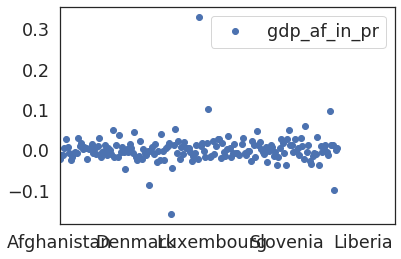

In [170]:
af_gdp.plot(y='gdp_af_in_pr',marker='o',linestyle='none')

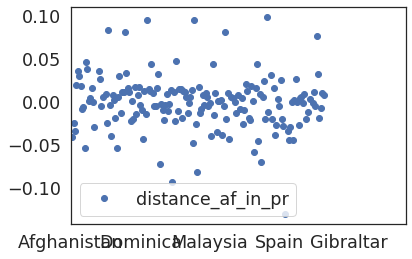

In [173]:
af_distances.plot(y='distance_af_in_pr',marker='o',linestyle='none')

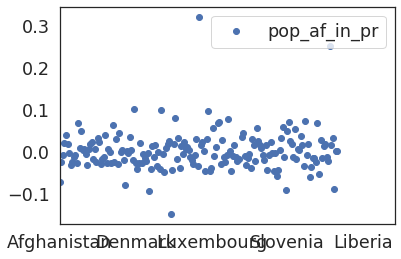

In [172]:
af_pop.plot(y='pop_af_in_pr',marker='o',linestyle='none')

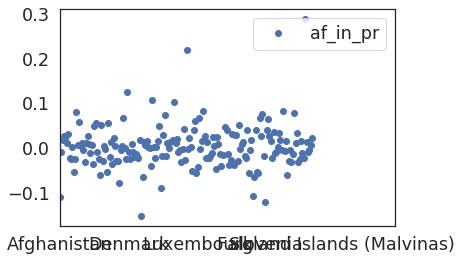

In [171]:
af.plot(y='af_in_pr',marker='o',linestyle='none')